# *Capstone Project - The Battle of the Neighborhoods (Part 2 of 2)*

## Introduction

This is the second part of the assignment for Coursera Capstone Project
Please refer to the following link in case you want/need to see details on the part 1 of 2: https://jp-tok.dataplatform.cloud.ibm.com/analytics/notebooks/v2/98622bb6-170d-4690-83ee-a97dd016cf75/view?access_token=187729180c46e88e38f7bdd12fb3a65dcbbd1f9ca45f2dcde5c28b0e1faf2410

In that url, there is the detailed content of the first 2 chapters of the assignment:

    1.Introduction/Business Background

    2.Data

The purpose of this notebook is to develop the remaining chapters: Methodology, Results, Discussion, and Conclusion.

 #### Let's recap on the work already done (part 1 of 2):

#### 1. Introduction/Business Problem 
The objective of this project is to ***find a suitable place for a restaurant in Buenos Aires, Argentina***.

The outcome of this work is oriented to ***help stakeholders interested in opening a Peruvian Restaurant in Ciudad de Buenos Aires, Buenos Aires, Argentina***.

Buenos Aires is a top tourist destination in Latin America, is known for its preserved eclectic european architecture and rich cultural life. Since it is a multicultural city, being home to multiple ethnic and religious groups, there are many restaurants, for that reason, looking for an adequate place to open a new one is an important challenge.

Some of the ***main drivers for decision making*** are related with the following factors:

- places not currently crowded with restaurants
- places in areas with group of ethnic restaurants (non of them with peruvian cousine)
- places thar are as close to city downtown

***Data Science*** methods, processes and tools will be applied in order to help identifying city areas candidates based on the aforesaid criteria.

Some of questions that this work may help to answer:

Is this a good place to open a restaurant?
Is it a promissing place that will allow the Business to have good financial performance?
Will it be a place that will help the Business to be expanded to other city areas in the future?

#### 2. Data 

Taking into account the Business Challenge, the 3 main drivers to be considered for collecting, wrangling,enrichment,and modeling the Data are as follows:

- places not currently crowded with restaurants
- places in areas with group of ethnic restaurants but with no Peruvian restaurants)
- places that are as close to city downtown

The 4 selected data sources to be used in this project are:

1-***Wikipedia***: Communes of Buenos Aires: information of the 15 communes Buenos Aires:

    English: https://en.wikipedia.org/wiki/Communes_of_Buenos_Aires 
    Spanish: https://es.wikipedia.org/wiki/Comunas_de_la_ciudad_de_Buenos_Aires 
    JSON file for Geolocation: 
    
    http://cdn.buenosaires.gob.ar/datosabiertos/datasets/comunas/CABA_comunas.geojson 

2-***Geolocator API***: coordinate of Ciudad de Buenos Aires will be obtained using services for geocoding

3-***Foursquare API***: information on restaurants and type of restaurants and location in the city https://foursquare.com/

4-***Restorando***: information on restaurants where average cost per person can be gathered https://buenos-aires.restorando.com.ar/

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Methodology</a>

2. <a href="#item2">Results</a>

3. <a href="#item3">Discussion</a>

4. <a href="#item4">Conclusion</a>

</font>
</div>

## 1. Methodology 


This chapter contains the exploratory data analysis, the inferential statistical testing performed, the machine learnings techniques use along the project.



The steps followed in order to fulfill the objective of the project were oriented to identify areas in Ciudad de Buenos Aires that are suitable for opening a new restaurant.

The Steps followed:

a) Understanding of the Business context:
- Basic konowledge fo Ciudad de Buenos Aires Geography and neighborhood: to proced with thi steps, GEO information gathered from Goverment is used. JSON files from goverment site was used to have a produce a map of the city and its 15 neighboorhoods or "Comunas"
- Data visualization of neighbohoods: in order to undertand the "big picture" folium graphs were created 
- Project oObjective reconfirmation was done with stakeholders, and as an outcome, 1 og the neighborhoods were set as teh targeted area (CABALLITO) due to its central position in Ciudad de Buenos Aires, and the particular interest in developing the business there 

b) Collecting all the necessary data for the analysis:
- location and type (category) of every restaurant in the nearby area of interest (Ciudad de Buenos Aires): Tools used FourSquare API, Geo libraries  
- reconfirming  central point of interest for the analysis: Tools used: wikipedia sites, and  GEO JSON file

c) Data exploration, data wrangling/enrichment and data modeling
- identification of venues in the nearby of the area of analysis (CABALLITO): use of data modeling techniques to breakdown CABALLITO area into sub-areas (matrix area view with centroids equally placed)
- isolation of the correct venues: filtering data in order to have only restaurant sites, and discard references to oher places such as coffee, spa, and so on.
- data modeling an enrichment of data in order to simplify multiple restaurant types (19) into 3 new created types: Local (argentinean restaurants),  fast foods, and Ethnical restaurants (where the Peruvian restaurant are included)

d) Inferential and statistical testing
- review statistics on restaurants in the target area to do drill down; top down / bottom up analysis comparing local argentinean restaurants an non argentinean restaurants (Mediterranean, Korean, Japanese, Italian, Peruvian, and so on)

e) Knowledge Discovery for making recommendation using Machine learning techniques
- use of k-means clustering in order to identify adequate areas within CABALLITO Comuna for putting a new Peruvian Restaurant. This is to plot at geographical level neighborhood / street the suitable place for starting the new business

#### The following code in this Notebook develops the Metodologý. Finally, Results, Discussion and Conclusions are shared

Importing the libraries..

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<a id='item1'></a>

### 1.a. Understanding of the Business context:

In [3]:
# Getting the data related to GEO info for Buenos Aires Argentina, Cuidad de Buenos Aires
# "BAC"    stands for Buenos Aires City
# "BAFULL" Stands for Buenos Aires Full GEO File downloaded from the URL below

!wget -q -O 'BAC_data.json' http://cdn.buenosaires.gob.ar/datosabiertos/datasets/comunas/CABA_comunas.geojson
print('Data downloaded!')

Data downloaded!


#### Loading data from external sources

In [4]:
with open('BAC_data.json') as json_data:
    BAFULL_data = json.load(json_data)

In [5]:
neighborhoods_data = BAFULL_data['features']

#### Tranform the data into a *pandas* dataframe

In [6]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)

In [7]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['COMUNAS'] 
    neighborhood_name = data['properties']['BARRIOS']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[0][0][0][1]
    neighborhood_lon = neighborhood_latlon[0][0][0][0]
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [8]:
#Shows the information gathered on Boroughs and Neighborhoods
neighborhoods.head(15)

,Borough,Neighborhood,Latitude,Longitude
0,2.0,RECOLETA,-34.570024,-58.380004
1,5.0,ALMAGRO - BOEDO,-34.614116,-58.412870
2,6.0,CABALLITO,-34.607047,-58.430606
3,7.0,FLORES - PARQUE CHACABUCO,-34.629745,-58.451995
4,9.0,LINIERS - MATADEROS - PARQUE AVELLANEDA,-34.633010,-58.519254
5,10.0,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,-34.620160,-58.488337
6,11.0,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,-34.596368,-58.498385
7,12.0,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,-34.593856,-58.503311
8,14.0,PALERMO,-34.552023,-58.426759
9,3.0,BALVANERA - SAN CRISTOBAL,-34.598003,-58.411919


In [9]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 15 boroughs and 15 neighborhoods.


#### Map of Buenos AIres City with its neighborhoods

In [10]:
BAC_data = neighborhoods[neighborhoods['Neighborhood'] == 'CABALLITO'].reset_index(drop=True)
BAC_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,6.0,CABALLITO,-34.607047,-58.430606


In [11]:
address = 'CABALLITO, CABA'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of CABALLITO, Center of Buenos Aires City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of CABALLITO, Center of Buenos Aires City are -34.6200773, -58.4424893.


In [12]:
#Generates vicinity arount CABALLITO Center
My_count = 0
My_Borough = BAC_data.loc[0, 'Borough']
My_Neighborhood = BAC_data.loc[0, 'Neighborhood']
BAC_data = neighborhoods[neighborhoods['Neighborhood'] == ''].reset_index(drop=True)  #clean table before populating

In [13]:
BAC_data.head()

,Borough,Neighborhood,Latitude,Longitude


In [14]:
for my_lat in [-34.60, -34.61, -34.62, -34.63, -34.64]:
    for my_lon in [-58.42, -58.43 , -58.44, -58.45, -58.46]:
        My_count = My_count +1
        BAC_data.loc[len(BAC_data)] = [My_Borough, My_Neighborhood+ " "+ str(My_count),my_lat, my_lon] 

In [15]:
 BAC_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,6.0,CABALLITO 1,-34.6,-58.42
1,6.0,CABALLITO 2,-34.6,-58.43
2,6.0,CABALLITO 3,-34.6,-58.44
3,6.0,CABALLITO 4,-34.6,-58.45
4,6.0,CABALLITO 5,-34.6,-58.46


In [16]:
# create map of Buenos Aires
map_BAC = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(BAC_data['Latitude'], BAC_data['Longitude'], BAC_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_BAC)  
    
map_BAC

Using the Foursquare API to explore the neighborhoods...

#### Preparing the call to Foursquare API by setting up Credentials and Version

In [17]:
CLIENT_ID = '1XCXJVJL3QADGOU2MEK2NVEPWHTG1TR1GVYES4XXNAOUPTX0' # your Foursquare ID
CLIENT_SECRET = '2EDVWSHJQ1YKRNCRUZPVFGKESJYI33OTUZ1ZRCHCKIJ4UDMI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#### Exploring the first neighborhood...

Get the neighborhood's name.

In [18]:
BAC_data.loc[0, 'Neighborhood']

'CABALLITO 1'

In [19]:
BAC_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,6.0,CABALLITO 1,-34.6,-58.42
1,6.0,CABALLITO 2,-34.6,-58.43
2,6.0,CABALLITO 3,-34.6,-58.44
3,6.0,CABALLITO 4,-34.6,-58.45
4,6.0,CABALLITO 5,-34.6,-58.46


In [20]:
BAC_data.shape

(25, 4)

In [21]:
neighborhood_latitude = BAC_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = BAC_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = BAC_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of CABALLITO 1 are -34.6, -58.42.


#### Getting the top 100 venues that are in CABALLITO within a radius of 500 meters.

In [22]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius =  500  # radius in meters
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=1XCXJVJL3QADGOU2MEK2NVEPWHTG1TR1GVYES4XXNAOUPTX0&client_secret=2EDVWSHJQ1YKRNCRUZPVFGKESJYI33OTUZ1ZRCHCKIJ4UDMI&v=20180605&ll=-34.6,-58.42&radius=500&limit=100'

In [23]:
results = requests.get(url).json()

A Function is defined to get the categories values in next loops..

In [24]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

The data from json file is uploaded in a dataframe

In [25]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

,name,categories,lat,lng
0,DNI Tango,Dance Studio,-34.599726,-58.417791
1,La Cresta,Deli / Bodega,-34.601740,-58.417931
2,Doña,Argentinian Restaurant,-34.602194,-58.417898
3,Megatlon,Gym,-34.602487,-58.418626
4,Confitería Augustus,Dessert Shop,-34.602215,-58.421028


In [26]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

73 venues were returned by Foursquare.


In [27]:
# a Specific dataframe for the Neighborhood CABALLITO is created..
CABALLITO_VENUES = nearby_venues[nearby_venues['name'] == ''].reset_index(drop=True)  #clean final destination table 

In [28]:
CABALLITO_VENUES.head()

,name,categories,lat,lng


In [29]:
#Gather venues in vicinity arount CABALLITO Center using FOURSQUARE API
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius =  500  # define radius
for my_i in range(0,len(BAC_data)):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        BAC_data.loc[my_i] ["Latitude"], 
        BAC_data.loc[my_i] ["Longitude"], 
        radius, 
        LIMIT)
    results = requests.get(url).json()
    #process results...
    venues = results['response']['groups'][0]['items']
    nearby_venues = json_normalize(venues) # flatten JSON
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues =nearby_venues.loc[:, filtered_columns]
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
    for my_record in range(0,len(nearby_venues)):
        CABALLITO_VENUES.loc[len(CABALLITO_VENUES)] = nearby_venues.loc[my_record]       

In [30]:
print('{} venues were returned by Foursquare.'.format(CABALLITO_VENUES.shape[0]))

638 venues were returned by Foursquare.


In [31]:
CABALLITO_VENUES.shape

(638, 4)

In [32]:
###  Explore the venues information ALL the records
CABALLITO_VENUES.head()

,name,categories,lat,lng
0,DNI Tango,Dance Studio,-34.599726,-58.417791
1,La Cresta,Deli / Bodega,-34.601740,-58.417931
2,Doña,Argentinian Restaurant,-34.602194,-58.417898
3,Megatlon,Gym,-34.602487,-58.418626
4,Confitería Augustus,Dessert Shop,-34.602215,-58.421028


Data Analysis observations:

First observation:  there are 638 venues in the area of analysis

Now  Reduces the dataframe to ONLY entries related to restaurants...

In [33]:
#Isolate restaurants
CABALLITO_RESTAURANTS = CABALLITO_VENUES[CABALLITO_VENUES['categories'] == ''].reset_index(drop=True)  #clean table before populating
for my_record in range(0,len(CABALLITO_VENUES)):
    temp_value = CABALLITO_VENUES.loc[my_record, 'categories'] 
    temp_value = temp_value.upper()
    result = temp_value.find('REST')
    if  result != -1 :
        CABALLITO_RESTAURANTS.loc[len(CABALLITO_RESTAURANTS)] = CABALLITO_VENUES.loc[my_record]  

In [34]:
CABALLITO_RESTAURANTS.shape

(119, 4)

There are 119 restaurants in the target area!

In [35]:
CABALLITO_RESTAURANTS.head(5)

,name,categories,lat,lng
0,Doña,Argentinian Restaurant,-34.602194,-58.417898
1,Lúcuma,Peruvian Restaurant,-34.601807,-58.422418
2,Pierino,Italian Restaurant,-34.600738,-58.415138
3,El Banderín,Argentinian Restaurant,-34.601654,-58.415303
4,Tienda de Empanadas,Empanada Restaurant,-34.602270,-58.420660


Let´s see how many quantity type of restaurants are ...

In [36]:
CABALLITO_RESTAURANTS["categories"].nunique()

19

There are 19 types of restaurants... 

In [37]:
CABALLITO_RESTAURANTS_GROUPED = CABALLITO_RESTAURANTS.groupby("categories").count().reset_index()

In [38]:
CABALLITO_RESTAURANTS_GROUPED

,categories,name,lat,lng
0,African Restaurant,1,1,1
1,Argentinian Restaurant,43,43,43
2,Chinese Restaurant,1,1,1
3,Empanada Restaurant,7,7,7
4,Fast Food Restaurant,8,8,8
5,French Restaurant,2,2,2
6,Italian Restaurant,9,9,9
7,Korean Restaurant,4,4,4
8,Latin American Restaurant,2,2,2
9,Mediterranean Restaurant,1,1,1


We need to improve quality on informations by enrichment.  A new fielf wil be added to determine among the 19 types, a summary type: Local;  Fast Food;  Ethnic   


This is to add more data modelling...

In [39]:
#Add type column
CABALLITO_RESTAURANTS_GROUPED["Type"]="Ethnic"

In [40]:
CABALLITO_RESTAURANTS_GROUPED.head()

,categories,name,lat,lng,Type
0,African Restaurant,1,1,1,Ethnic
1,Argentinian Restaurant,43,43,43,Ethnic
2,Chinese Restaurant,1,1,1,Ethnic
3,Empanada Restaurant,7,7,7,Ethnic
4,Fast Food Restaurant,8,8,8,Ethnic


In [41]:
#Now filling the type field
#Assume all are ethnic and put exeptions according to values category
for my_record in range(0,len(CABALLITO_RESTAURANTS_GROUPED)):
    temp_value = CABALLITO_RESTAURANTS_GROUPED.loc[my_record, 'categories'] 
    if  temp_value == "Argentinian Restaurant" :
        CABALLITO_RESTAURANTS_GROUPED.loc[my_record, 'Type'] = "Local"
    if  temp_value == "Restaurant" :
        CABALLITO_RESTAURANTS_GROUPED.loc[my_record, 'Type'] = "Local"
    if  temp_value == "Fast Food Restaurant" :
        CABALLITO_RESTAURANTS_GROUPED.loc[my_record, 'Type'] = "Fast Food"
    if  temp_value == "Empanada Restaurant" :
        CABALLITO_RESTAURANTS_GROUPED.loc[my_record, 'Type'] = "Fast Food"       

In [42]:
CABALLITO_RESTAURANTS_GROUPED.head()

,categories,name,lat,lng,Type
0,African Restaurant,1,1,1,Ethnic
1,Argentinian Restaurant,43,43,43,Local
2,Chinese Restaurant,1,1,1,Ethnic
3,Empanada Restaurant,7,7,7,Fast Food
4,Fast Food Restaurant,8,8,8,Fast Food


In [43]:
CABALLITO_RESTAURANTS_GROUPED = CABALLITO_RESTAURANTS_GROUPED.drop('lat',1)
CABALLITO_RESTAURANTS_GROUPED = CABALLITO_RESTAURANTS_GROUPED.drop('lng',1)

In [44]:
CABALLITO_RESTAURANTS_GROUPED.head()

,categories,name,Type
0,African Restaurant,1,Ethnic
1,Argentinian Restaurant,43,Local
2,Chinese Restaurant,1,Ethnic
3,Empanada Restaurant,7,Fast Food
4,Fast Food Restaurant,8,Fast Food


More data modelling...

In [45]:
#Add type column into dataframe 
for my_record in range(0,len(CABALLITO_RESTAURANTS)):
    temp_value = CABALLITO_RESTAURANTS.loc[my_record, 'categories'] 
    #search the type of restaurant...
    my_type = ""
    for my_i in range(0,len(CABALLITO_RESTAURANTS_GROUPED)):
        if  temp_value == CABALLITO_RESTAURANTS_GROUPED.loc[my_i,'categories'] :
            my_type = CABALLITO_RESTAURANTS_GROUPED.loc[my_i,'Type']
    CABALLITO_RESTAURANTS.loc[my_record, 'Type'] = my_type

In [46]:
CABALLITO_RESTAURANTS.head()

,name,categories,lat,lng,Type
0,Doña,Argentinian Restaurant,-34.602194,-58.417898,Local
1,Lúcuma,Peruvian Restaurant,-34.601807,-58.422418,Ethnic
2,Pierino,Italian Restaurant,-34.600738,-58.415138,Ethnic
3,El Banderín,Argentinian Restaurant,-34.601654,-58.415303,Local
4,Tienda de Empanadas,Empanada Restaurant,-34.602270,-58.420660,Fast Food


<a id='item2'></a>

### 1.b. Collecting all the necessary data for the analysis

Using a function to repeat the process of gathering neighborhoods information 

In [47]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        results = requests.get(url).json()["response"]['groups'][0]['items']
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [48]:
# Using the function to get CABALLITO nearby venues
BAC_venues = getNearbyVenues(names=BAC_data['Neighborhood'],latitudes=BAC_data['Latitude'],longitudes=BAC_data['Longitude'])

CABALLITO 1
CABALLITO 2
CABALLITO 3
CABALLITO 4
CABALLITO 5
CABALLITO 6
CABALLITO 7
CABALLITO 8
CABALLITO 9
CABALLITO 10
CABALLITO 11
CABALLITO 12
CABALLITO 13
CABALLITO 14
CABALLITO 15
CABALLITO 16
CABALLITO 17
CABALLITO 18
CABALLITO 19
CABALLITO 20
CABALLITO 21
CABALLITO 22
CABALLITO 23
CABALLITO 24
CABALLITO 25


In [49]:
print(BAC_venues.shape)
BAC_venues.head()

(638, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,CABALLITO 1,-34.6,-58.42,DNI Tango,-34.599726,-58.417791,Dance Studio
1,CABALLITO 1,-34.6,-58.42,La Cresta,-34.601740,-58.417931,Deli / Bodega
2,CABALLITO 1,-34.6,-58.42,Doña,-34.602194,-58.417898,Argentinian Restaurant
3,CABALLITO 1,-34.6,-58.42,Megatlon,-34.602487,-58.418626,Gym
4,CABALLITO 1,-34.6,-58.42,Confitería Augustus,-34.602215,-58.421028,Dessert Shop


In [50]:
BAC_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
CABALLITO 1,73,73,73,73,73,73
CABALLITO 10,8,8,8,8,8,8
CABALLITO 11,24,24,24,24,24,24
CABALLITO 12,38,38,38,38,38,38
CABALLITO 13,63,63,63,63,63,63
CABALLITO 14,22,22,22,22,22,22
CABALLITO 15,14,14,14,14,14,14
CABALLITO 16,16,16,16,16,16,16
CABALLITO 17,18,18,18,18,18,18


In [51]:
### At this point the venues will be filtered in order to have onnly those related to Restaurants...

In [52]:
#Identifies if the venue is a restaurant and put a mark in the dataframe
BAC_venues["Is_a_Restaurant"] = False
for my_record in range(0,len(BAC_venues)):
    temp_value = BAC_venues.loc[my_record, 'Venue Category'] 
    temp_value = temp_value.upper()
    result = temp_value.find('REST')
    if  result != -1 :
        BAC_venues.loc[my_record,"Is_a_Restaurant"] = True
    else:
        BAC_venues.loc[my_record,"Is_a_Restaurant"] = False

In [53]:
BAC_venues.shape

(638, 8)

In [54]:
#clean records that are not restaurant venues
BAC_venues = BAC_venues[BAC_venues['Is_a_Restaurant'] == True].reset_index(drop=True) 

In [55]:
BAC_venues.shape

(119, 8)

In [56]:
BAC_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Is_a_Restaurant
0,CABALLITO 1,-34.6,-58.42,Doña,-34.602194,-58.417898,Argentinian Restaurant,True
1,CABALLITO 1,-34.6,-58.42,Lúcuma,-34.601807,-58.422418,Peruvian Restaurant,True
2,CABALLITO 1,-34.6,-58.42,Pierino,-34.600738,-58.415138,Italian Restaurant,True
3,CABALLITO 1,-34.6,-58.42,El Banderín,-34.601654,-58.415303,Argentinian Restaurant,True
4,CABALLITO 1,-34.6,-58.42,Tienda de Empanadas,-34.602270,-58.420660,Empanada Restaurant,True


In [57]:
print('There are {} uniques categories.'.format(len(BAC_venues['Venue Category'].unique())))

There are 19 uniques categories.


<a id='item3'></a>

### 1.c. Data exploration, data wrangling/enrichment and data modeling

In [58]:
#arranging the data to allow analysis -> table with restaurants in columns
BAC_onehot = pd.get_dummies(BAC_venues[['Venue Category']], prefix="", prefix_sep="")
BAC_onehot['Neighborhood'] = BAC_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [BAC_onehot.columns[-1]] + list(BAC_onehot.columns[:-1])
BAC_onehot = BAC_onehot[fixed_columns]
BAC_onehot.head()

,Neighborhood,African Restaurant,Argentinian Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant,French Restaurant,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Paella Restaurant,Peruvian Restaurant,Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Vegetarian / Vegan Restaurant
0,CABALLITO 1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CABALLITO 1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,CABALLITO 1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,CABALLITO 1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CABALLITO 1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
BAC_onehot.shape

(119, 20)

#### Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each restaurant type

In [60]:
BAC_grouped = BAC_onehot.groupby('Neighborhood').mean().reset_index()
BAC_grouped

,Neighborhood,African Restaurant,Argentinian Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant,French Restaurant,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Paella Restaurant,Peruvian Restaurant,Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Vegetarian / Vegan Restaurant
0,CABALLITO 1,0.000000,0.307692,0.000000,0.076923,0.076923,0.000000,0.076923,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.230769,0.000000,0.000000,0.076923,0.076923
1,CABALLITO 10,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,CABALLITO 11,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,CABALLITO 12,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.333333,0.166667,0.000000
4,CABALLITO 13,0.000000,0.000000,0.000000,0.000000,0.272727,0.090909,0.090909,0.0,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.363636,0.000000,0.000000,0.000000,0.000000
5,CABALLITO 14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
6,CABALLITO 15,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,CABALLITO 16,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,CABALLITO 17,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,CABALLITO 18,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.200000,0.000000,0.000000


In [61]:
# Now the table is 25 neighboohoods (split areas in CABALLITO ) by Nighborhood + 19 Restaurant types

In [62]:
BAC_grouped.shape

(25, 20)

#### Visualizing neighborhood the top 5 most common restaurant types in each one

In [63]:
num_top_venues = 5
for hood in BAC_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = BAC_grouped[BAC_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----CABALLITO 1----
                           venue  freq
0         Argentinian Restaurant  0.31
1                     Restaurant  0.23
2  Vegetarian / Vegan Restaurant  0.08
3               Tapas Restaurant  0.08
4            Empanada Restaurant  0.08


----CABALLITO 10----
                       venue  freq
0         Italian Restaurant   0.5
1     Argentinian Restaurant   0.5
2         African Restaurant   0.0
3  Middle Eastern Restaurant   0.0
4           Tapas Restaurant   0.0


----CABALLITO 11----
                       venue  freq
0         Italian Restaurant  0.33
1          Paella Restaurant  0.33
2     Argentinian Restaurant  0.33
3         African Restaurant  0.00
4  Middle Eastern Restaurant  0.00


----CABALLITO 12----
                    venue  freq
0        Sushi Restaurant  0.33
1  Argentinian Restaurant  0.33
2        Tapas Restaurant  0.17
3      Spanish Restaurant  0.17
4      African Restaurant  0.00


----CABALLITO 13----
                  venue  freq
0           

#### Putting the analyzed information in dataframe format...

Using a function to sort the venues in descending order...

In [64]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

Using the function to create the  data frame and display the top 10 venues(restaurant type) for each neighborhood.

In [65]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try: 
        columns.append('{}{} Most Common Rest type'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Rest type'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = BAC_grouped['Neighborhood']

for ind in np.arange(BAC_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(BAC_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Rest type,2nd Most Common Rest type,3rd Most Common Rest type,4th Most Common Rest type,5th Most Common Rest type,6th Most Common Rest type,7th Most Common Rest type,8th Most Common Rest type,9th Most Common Rest type,10th Most Common Rest type
0,CABALLITO 1,Argentinian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Peruvian Restaurant,Empanada Restaurant,Fast Food Restaurant,Tapas Restaurant,Italian Restaurant,Korean Restaurant,Chinese Restaurant
1,CABALLITO 10,Argentinian Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant,French Restaurant,Korean Restaurant,Mediterranean Restaurant
2,CABALLITO 11,Argentinian Restaurant,Paella Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant,French Restaurant,Korean Restaurant
3,CABALLITO 12,Sushi Restaurant,Argentinian Restaurant,Spanish Restaurant,Tapas Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant,French Restaurant
4,CABALLITO 13,Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Mexican Restaurant,French Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Argentinian Restaurant,Chinese Restaurant


### 1.d. Inferential and statistical testing

In [165]:
CABALLITO_RESTAURANTS.shape

(119, 5)

In [166]:
CABALLITO_RESTAURANTS.head()

,name,categories,lat,lng,Type
0,Doña,Argentinian Restaurant,-34.602194,-58.417898,Local
1,Lúcuma,Peruvian Restaurant,-34.601807,-58.422418,Ethnic
2,Pierino,Italian Restaurant,-34.600738,-58.415138,Ethnic
3,El Banderín,Argentinian Restaurant,-34.601654,-58.415303,Local
4,Tienda de Empanadas,Empanada Restaurant,-34.602270,-58.420660,Fast Food


In [167]:
#isolates the Peruvian Restaurant
CABALLITO_RESTAURANTS.loc[1] 

name                       Lúcuma
categories    Peruvian Restaurant
lat                      -34.6018
lng                      -58.4224
Type                       Ethnic
Name: 1, dtype: object

In [168]:
CABALLITO_RESTAURANTS_GROUPED.head()

,categories,name,Type,Count
0,African Restaurant,1,Ethnic,1
1,Argentinian Restaurant,43,Local,43
2,Chinese Restaurant,1,Ethnic,1
3,Empanada Restaurant,7,Fast Food,7
4,Fast Food Restaurant,8,Fast Food,8


In [169]:
#Set up a graph to show all restaurants by category
# use the inline backend to generate the plots within the browser
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.3


In [170]:
CABALLITO_RESTAURANTS_GROUPED['Count'] = CABALLITO_RESTAURANTS_GROUPED['name']

In [171]:
CABALLITO_RESTAURANTS_GROUPED.head(20)

,categories,name,Type,Count
0,African Restaurant,1,Ethnic,1
1,Argentinian Restaurant,43,Local,43
2,Chinese Restaurant,1,Ethnic,1
3,Empanada Restaurant,7,Fast Food,7
4,Fast Food Restaurant,8,Fast Food,8
5,French Restaurant,2,Ethnic,2
6,Italian Restaurant,9,Ethnic,9
7,Korean Restaurant,4,Ethnic,4
8,Latin American Restaurant,2,Ethnic,2
9,Mediterranean Restaurant,1,Ethnic,1


In [172]:
df_can = CABALLITO_RESTAURANTS_GROUPED.head(20)

In [173]:
df_can.head(20)

,categories,name,Type,Count
0,African Restaurant,1,Ethnic,1
1,Argentinian Restaurant,43,Local,43
2,Chinese Restaurant,1,Ethnic,1
3,Empanada Restaurant,7,Fast Food,7
4,Fast Food Restaurant,8,Fast Food,8
5,French Restaurant,2,Ethnic,2
6,Italian Restaurant,9,Ethnic,9
7,Korean Restaurant,4,Ethnic,4
8,Latin American Restaurant,2,Ethnic,2
9,Mediterranean Restaurant,1,Ethnic,1


In [174]:
df_can.sort_values(['Count'], ascending=True, axis=0, inplace=True)

In [175]:
df_can.head(20)

,categories,name,Type,Count
0,African Restaurant,1,Ethnic,1
15,Spanish Restaurant,1,Ethnic,1
13,Peruvian Restaurant,1,Ethnic,1
12,Paella Restaurant,1,Ethnic,1
9,Mediterranean Restaurant,1,Ethnic,1
2,Chinese Restaurant,1,Ethnic,1
5,French Restaurant,2,Ethnic,2
8,Latin American Restaurant,2,Ethnic,2
17,Tapas Restaurant,3,Ethnic,3
10,Mexican Restaurant,3,Ethnic,3


In [176]:
df_can.set_index('categories', inplace=True)
# let's view the first five elements and see how the dataframe was changed
df_can.head(20)

,name,Type,Count
categories,,,
African Restaurant,1,Ethnic,1
Spanish Restaurant,1,Ethnic,1
Peruvian Restaurant,1,Ethnic,1
Paella Restaurant,1,Ethnic,1
Mediterranean Restaurant,1,Ethnic,1
Chinese Restaurant,1,Ethnic,1
French Restaurant,2,Ethnic,2
Latin American Restaurant,2,Ethnic,2
Tapas Restaurant,3,Ethnic,3


In [177]:
df_can.drop(['name', 'Type'], axis=1, inplace=True)

In [178]:
df_can.head()

,Count
categories,
African Restaurant,1
Spanish Restaurant,1
Peruvian Restaurant,1
Paella Restaurant,1
Mediterranean Restaurant,1


In [179]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_can.columns)

True

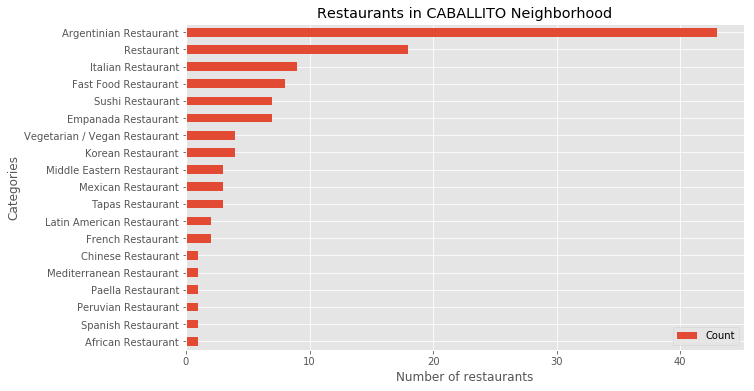

In [180]:
df_can.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Number of restaurants') 
plt.ylabel('Categories') 
plt.title('Restaurants in CABALLITO Neighborhood') 

plt.show()

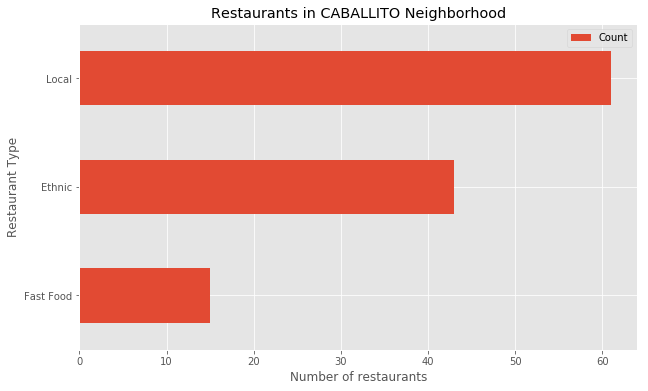

In [206]:
df_can.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Number of restaurants') 
plt.ylabel('Restaurant Type') 
plt.title('Restaurants in CABALLITO Neighborhood') 

plt.show()

In [198]:
#new graph groupping the categories (restaurant type) in only 3 values: local, fast food, ethnic

In [199]:
df_can = CABALLITO_RESTAURANTS_GROUPED.groupby('Type').sum().reset_index()

In [200]:
df_can.head()

,Type,name,Count
0,Ethnic,43,43
1,Fast Food,15,15
2,Local,61,61


In [201]:
df_can.sort_values(['Count'], ascending=True, axis=0, inplace=True)

In [202]:
df_can.head()

,Type,name,Count
1,Fast Food,15,15
0,Ethnic,43,43
2,Local,61,61


In [203]:
df_can.drop(['name'], axis=1, inplace=True)

In [204]:
df_can.head()

,Type,Count
1,Fast Food,15
0,Ethnic,43
2,Local,61


In [205]:
df_can.set_index('Type', inplace=True)
# let's view the first five elements and see how the dataframe was changed
df_can.head()

,Count
Type,
Fast Food,15
Ethnic,43
Local,61


### 1.e. Knowledge Discovery for making recommendation using Machine learning techniques

In [77]:
# K-means clustering is used to create 5 clusters


In [78]:
# set number of clusters
kclusters = 5
BAC_grouped_clustering = BAC_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(BAC_grouped_clustering)

In [79]:
BAC_grouped_clustering.head()

,African Restaurant,Argentinian Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant,French Restaurant,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Paella Restaurant,Peruvian Restaurant,Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Vegetarian / Vegan Restaurant
0,0.0,0.307692,0.0,0.076923,0.076923,0.000000,0.076923,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.076923,0.230769,0.000000,0.000000,0.076923,0.076923
1,0.0,0.500000,0.0,0.000000,0.000000,0.000000,0.500000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.333333,0.0,0.000000,0.000000,0.000000,0.333333,0.0,0.0,0.0,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.333333,0.166667,0.000000
4,0.0,0.000000,0.0,0.000000,0.272727,0.090909,0.090909,0.0,0.0,0.0,0.090909,0.090909,0.000000,0.000000,0.363636,0.000000,0.000000,0.000000,0.000000


A new data frame including the cluster code as well as the top restaurant types

In [80]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
BAC_merged = BAC_data
BAC_merged = BAC_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
BAC_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Rest type,2nd Most Common Rest type,3rd Most Common Rest type,4th Most Common Rest type,5th Most Common Rest type,6th Most Common Rest type,7th Most Common Rest type,8th Most Common Rest type,9th Most Common Rest type,10th Most Common Rest type
0,6.0,CABALLITO 1,-34.6,-58.42,0,Argentinian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Peruvian Restaurant,Empanada Restaurant,Fast Food Restaurant,Tapas Restaurant,Italian Restaurant,Korean Restaurant,Chinese Restaurant
1,6.0,CABALLITO 2,-34.6,-58.43,0,Restaurant,Sushi Restaurant,Argentinian Restaurant,Middle Eastern Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant
2,6.0,CABALLITO 3,-34.6,-58.44,0,Argentinian Restaurant,Sushi Restaurant,Fast Food Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Chinese Restaurant,Empanada Restaurant,Latin American Restaurant,African Restaurant
3,6.0,CABALLITO 4,-34.6,-58.45,0,Italian Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Argentinian Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant,French Restaurant,Korean Restaurant,Mediterranean Restaurant
4,6.0,CABALLITO 5,-34.6,-58.46,1,Argentinian Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant,French Restaurant,Italian Restaurant,Korean Restaurant,Mediterranean Restaurant


Visualizing the clusters in a map using folium..

In [81]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(BAC_merged['Latitude'], BAC_merged['Longitude'], BAC_merged['Neighborhood'], BAC_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

<a id='item5'></a>

#### Analyzing the clustering results

Five clusters have been created depicting the characteristics of each sub area within CABALLITO, that is the selected Neighoorhood within Buenos Aires City, Buenos Aires, Argentina.

#### Cluster 1

In [82]:
BAC_merged.loc[BAC_merged['Cluster Labels'] == 0, BAC_merged.columns[[1] + list(range(5, BAC_merged.shape[1]))]]

,Neighborhood,1st Most Common Rest type,2nd Most Common Rest type,3rd Most Common Rest type,4th Most Common Rest type,5th Most Common Rest type,6th Most Common Rest type,7th Most Common Rest type,8th Most Common Rest type,9th Most Common Rest type,10th Most Common Rest type
0,CABALLITO 1,Argentinian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Peruvian Restaurant,Empanada Restaurant,Fast Food Restaurant,Tapas Restaurant,Italian Restaurant,Korean Restaurant,Chinese Restaurant
1,CABALLITO 2,Restaurant,Sushi Restaurant,Argentinian Restaurant,Middle Eastern Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant
2,CABALLITO 3,Argentinian Restaurant,Sushi Restaurant,Fast Food Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Chinese Restaurant,Empanada Restaurant,Latin American Restaurant,African Restaurant
3,CABALLITO 4,Italian Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Argentinian Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant,French Restaurant,Korean Restaurant,Mediterranean Restaurant
6,CABALLITO 7,Argentinian Restaurant,Empanada Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant,Italian Restaurant,Korean Restaurant
7,CABALLITO 8,Argentinian Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Fast Food Restaurant,Latin American Restaurant,Chinese Restaurant,Empanada Restaurant,French Restaurant,Italian Restaurant,Korean Restaurant
9,CABALLITO 10,Argentinian Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant,French Restaurant,Korean Restaurant,Mediterranean Restaurant
10,CABALLITO 11,Argentinian Restaurant,Paella Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant,French Restaurant,Korean Restaurant
11,CABALLITO 12,Sushi Restaurant,Argentinian Restaurant,Spanish Restaurant,Tapas Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant,French Restaurant
12,CABALLITO 13,Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Mexican Restaurant,French Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Argentinian Restaurant,Chinese Restaurant


#### Cluster 2

This cluster is dominated mainly by argentinean restaurants, with some participation of Ethnic restaurants.
There is only one Peruvian restarurant and it is included in this cluster.

In [83]:
BAC_merged.loc[BAC_merged['Cluster Labels'] == 1, BAC_merged.columns[[1] + list(range(5, BAC_merged.shape[1]))]]

,Neighborhood,1st Most Common Rest type,2nd Most Common Rest type,3rd Most Common Rest type,4th Most Common Rest type,5th Most Common Rest type,6th Most Common Rest type,7th Most Common Rest type,8th Most Common Rest type,9th Most Common Rest type,10th Most Common Rest type
4,CABALLITO 5,Argentinian Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant,French Restaurant,Italian Restaurant,Korean Restaurant,Mediterranean Restaurant
5,CABALLITO 6,Argentinian Restaurant,Italian Restaurant,Empanada Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant,Korean Restaurant
8,CABALLITO 9,Argentinian Restaurant,Empanada Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant,Italian Restaurant,Korean Restaurant,Mediterranean Restaurant
14,CABALLITO 15,Argentinian Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant,French Restaurant,Italian Restaurant,Korean Restaurant,Mediterranean Restaurant
15,CABALLITO 16,Argentinian Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant,French Restaurant,Italian Restaurant,Korean Restaurant,Mediterranean Restaurant
16,CABALLITO 17,Argentinian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Chinese Restaurant,Empanada Restaurant,French Restaurant,Italian Restaurant,Korean Restaurant,Mediterranean Restaurant
17,CABALLITO 18,Argentinian Restaurant,Sushi Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant,French Restaurant,Italian Restaurant
20,CABALLITO 21,Argentinian Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant,French Restaurant,Italian Restaurant,Korean Restaurant,Mediterranean Restaurant


#### Cluster 3

This cluster is dominated mainly by argentinean restaurants, and the second  type is related to vegetarian / vegan cousine.

In [84]:
BAC_merged.loc[BAC_merged['Cluster Labels'] == 2, BAC_merged.columns[[1] + list(range(5, BAC_merged.shape[1]))]]

,Neighborhood,1st Most Common Rest type,2nd Most Common Rest type,3rd Most Common Rest type,4th Most Common Rest type,5th Most Common Rest type,6th Most Common Rest type,7th Most Common Rest type,8th Most Common Rest type,9th Most Common Rest type,10th Most Common Rest type
22,CABALLITO 23,Korean Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Argentinian Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant,French Restaurant,Italian Restaurant,Mediterranean Restaurant
23,CABALLITO 24,Korean Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Argentinian Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant,French Restaurant,Italian Restaurant,Mediterranean Restaurant


#### Cluster 4

This cluster is dominated by Korean Cousine.

In [85]:
BAC_merged.loc[BAC_merged['Cluster Labels'] == 3, BAC_merged.columns[[1] + list(range(5, BAC_merged.shape[1]))]]

,Neighborhood,1st Most Common Rest type,2nd Most Common Rest type,3rd Most Common Rest type,4th Most Common Rest type,5th Most Common Rest type,6th Most Common Rest type,7th Most Common Rest type,8th Most Common Rest type,9th Most Common Rest type,10th Most Common Rest type
13,CABALLITO 14,Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Argentinian Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant,French Restaurant,Italian Restaurant,Korean Restaurant
19,CABALLITO 20,Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Argentinian Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant,French Restaurant,Italian Restaurant,Korean Restaurant


#### Cluster 5

This cluster is ruled by Vegetarian and Latin American cousine.

In [86]:
BAC_merged.loc[BAC_merged['Cluster Labels'] == 4, BAC_merged.columns[[1] + list(range(5, BAC_merged.shape[1]))]]

,Neighborhood,1st Most Common Rest type,2nd Most Common Rest type,3rd Most Common Rest type,4th Most Common Rest type,5th Most Common Rest type,6th Most Common Rest type,7th Most Common Rest type,8th Most Common Rest type,9th Most Common Rest type,10th Most Common Rest type
24,CABALLITO 25,Latin American Restaurant,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Chinese Restaurant,Empanada Restaurant,Fast Food Restaurant,French Restaurant,Italian Restaurant,Korean Restaurant,Mediterranean Restaurant


## 2. Results 



This cluster is ruled by Latin American cousine.

 
- 119  restaurants have been identified in the target area: CABALLITO neighborhood, Ciudad de Buenos Aires, Argentina.

- All of them can be grouped in 19 type of restaurants: Argentinean, Fast Foods, and an important sub-group of Ethnic restaurants (Korean, Italian, Mediterranean, and so on).  

- Among the Ethnic restaurants, there is only one **Peruvian restaurant**! This represents an **opportunity** since the target area is a broad one, 2.5 km radius from a CABALLITO Neighborhood central point. There is space to open new business there with a minimal number of competitors.

- Considering the Clustering done in order to determine different groups, the results were as follows:
    - 5 clusters created:
    - Cluster 1: dominated mainly by Argentinean restaurants, with some participation of Ethnic restaurants. There is only one Peruvian restaurant and it is included in this cluster
    - Cluster 2: dominated mainly by Argentinean restaurants, and the second type is related to vegetarian / vegan cousine
    - Cluster 3: dominated by Korean cousine
    - Cluster 4: dominated by Vegetarian and Latin American cousine
    - Cluster 5: dominated by Lain American cousine
    
    
- Recommendation for setting up the new restaurant is avoid Cluster 1, using any other cluster 



## 3. Discussion

Based on the aforesaid results, there are good opportunities for setting up a Peruvian Restaurant in CABALLITO Neighborhood, Ciudad de Buenos Aires Argentina.  Decision on the place should consider not using cluster 1 in order to avoid a competitive scenario with the already existing Peruvian Restaurant in the neighborhood.    Other cluster can be taking into account for the destination place.

Further analysis can be done taking into accunt other inputs from the stakeholders.


## 4. Conclusion

The objective of this project was to find a suitable place for a restaurant in Buenos Aires, Argentina.
The project activities were oriented to help stakeholders interested in opening a Peruvian Restaurant in Ciudad de Buenos Aires, Buenos Aires, Argentina.

The main drivers for decision making were:
- places not currently crowded with restaurants
- places in areas with group of ethnic restaurants (but with no Peruvian restaurants)
- places that are as close to city downtown


Applying Data Science Methods, Processes and Techniques, and supported by tools such as Foursquare data, some areas have been identified as adequate places for opening a Peruvian restaurant in Ciudad de Buenos Aires, Argentina,  in the nearby of CABALLITO Comuna.

Clustering techniques have helped to indicate potential areas for business development in the restaurant arena. The ultimate word on the most adequate location for opening the new business is in charge of the stakeholders, that can use this work as input in their decision making process.

There are a set of opportunities that indicates there are good prospect in the CABALLITO area to set up a new business opening a new Peruvian Restaurant:  one 1 competitor, when for other Ethnic restaurants (such as Korean restaurants) there are many.


Further analysis can be performed using more elements that can be added from the stakeholders point of view. 

### **This is The End of the Notebook**



This notebook was created by  Hector Silva Diniz as part of the training activity related to Coursera IBM Data Science Certification programe.

Ciudad de Buenos Aires, Argentina

May 22nd, 2019
